In [263]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


The following code is for plotting values for our empirical analysis to determine our pruning functions.

In [264]:
# Exponential decay function without the shift parameter
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def plot_exponential_fit(file_path, title, shift_amount):
    # Read the data
    data = np.loadtxt(file_path)
    x_data, y_data = data[:, 0], data[:, 1]

    # Fit the data to the exponential decay function
    params, covariance = curve_fit(exponential_decay, x_data, y_data, p0=[1, 1e-2, 1])

    # Calculate the shifted parameters
    params_shifted = params.copy()
    params_shifted[2] += shift_amount  # Apply the shift to the c parameter

    # Set the figure size
    plt.figure(figsize=(9, 6))

    # Plot the raw data
    plt.scatter(x_data, y_data, label='Data', color='b')

    # Calculate and plot the shifted exponential decay curve
    x_model = np.linspace(min(x_data), max(x_data), 1000)
    y_model_shifted = exponential_decay(x_model, *params_shifted)
    plt.plot(x_model, y_model_shifted, label=f'Shifted Fit: a={params_shifted[0]:.3f}, b={params_shifted[1]:.3f}, c={params_shifted[2]:.3f}', color='r', linestyle='--')
    plt.title(title)
    plt.xlabel('Number of Nodes')
    plt.ylabel('Highest Edge Weight from an MST')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

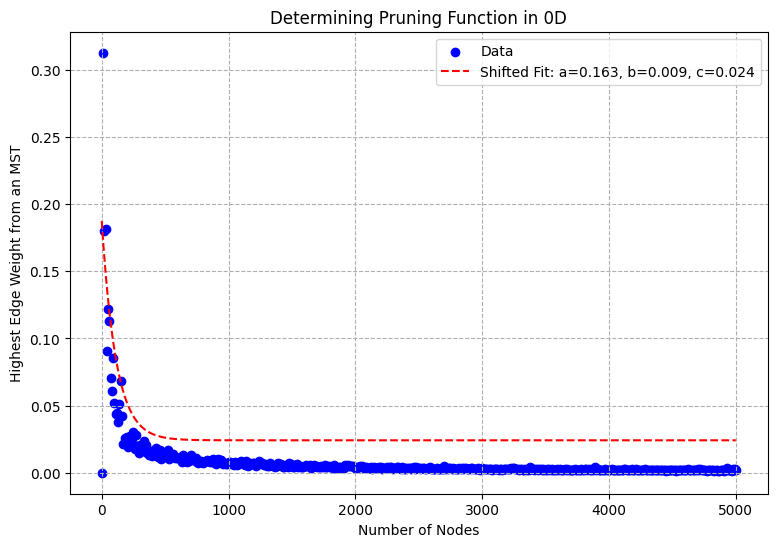

In [265]:
# 0D Pruning
plot_exponential_fit("0DPruning.txt","Determining Pruning Function in 0D",  0.02)

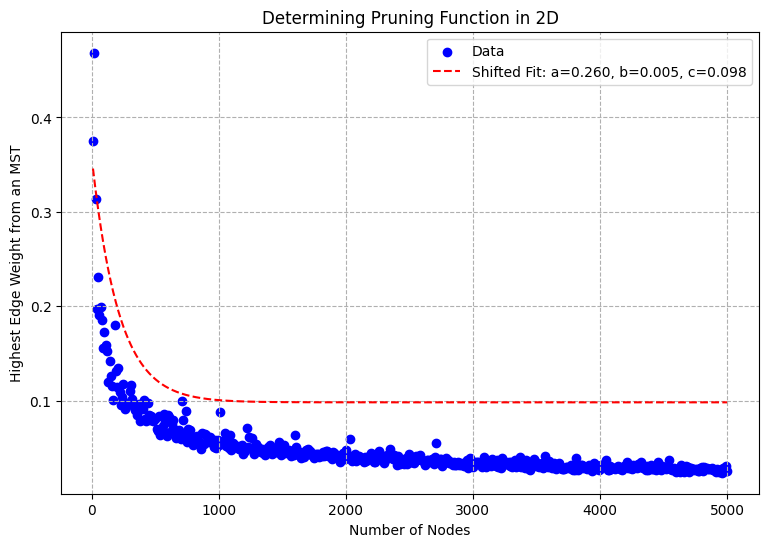

In [266]:
# 2D Pruning
plot_exponential_fit("2DPruning.txt","Determining Pruning Function in 2D",  0.06)

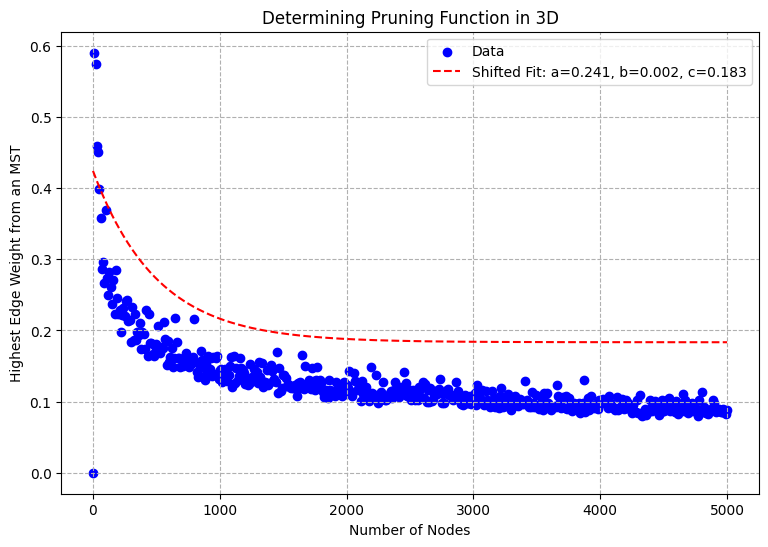

In [267]:
# 3D Pruning
plot_exponential_fit("3DPruning.txt","Determining Pruning Function in 3D",  0.08)

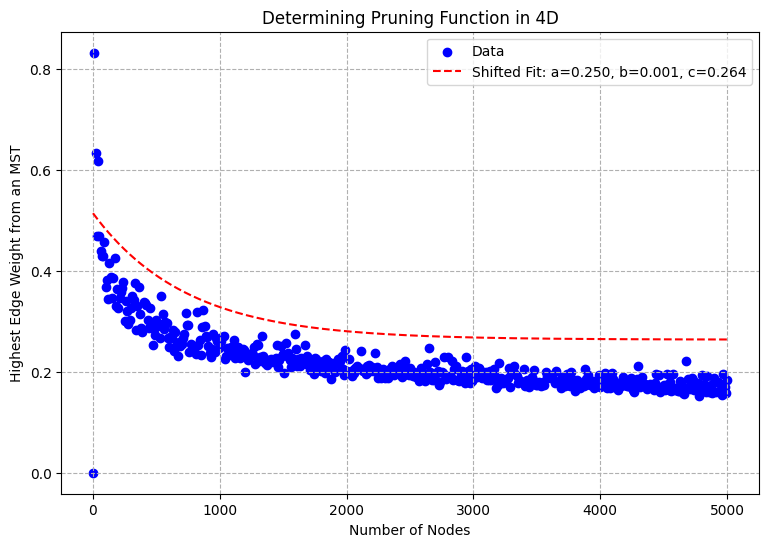

In [268]:
# 4D Pruning
plot_exponential_fit("4DPruning.txt","Determining Pruning Function in 4D",  0.08)

The following code is for plotting values to obtain our average MST functions.

In [269]:
# Define the power-law function
def new_func(x, a, b):
    return a * (x ** b)

# Function to plot data and fit the power-law function
def plot_and_fit_power_law(n_values, average_tree_size, title):
    # Fit the power-law function to the data
    params, covariance = curve_fit(new_func, n_values, average_tree_size, maxfev=10000)

    # Generate values for plotting the fitted curve
    x_fit = np.linspace(min(n_values), max(n_values), 400)
    y_fit = new_func(x_fit, *params)

    # Preparing the label with the function definition including fitted parameters
    label = f'Line of Best Fit: y = {params[0]:.3f} * x^{{ {params[1]:.3f} }}'

    # Plotting the points and the fitted curve
    plt.figure(figsize=(9, 6))
    plt.scatter(n_values, average_tree_size, label='Data Points', color='b')
    plt.plot(x_fit, y_fit, label=label, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel('Number of Nodes')
    plt.ylabel('Average Weight of Minimum Spanning Tree')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

    # Output the parameters of the fitted function
    print(f"Fitted parameters: a = {params[0]}, b = {params[1]}")

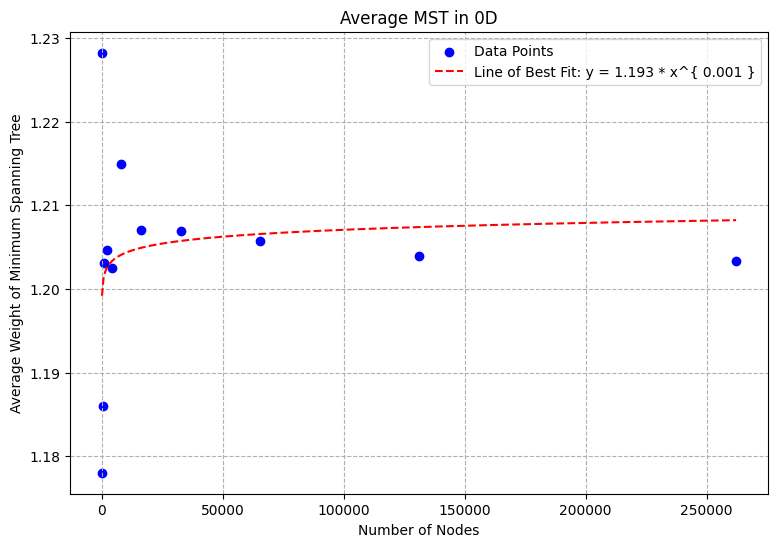

Fitted parameters: a = 1.1934726395346198, b = 0.0009845109048559767


In [270]:
# 0D Average MST
n_values_0 = np.array([128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144])
average_tree_size_0 = np.array([1.17804, 1.22824, 1.18603, 1.20308, 1.20466, 1.20254, 1.2149, 1.20702, 1.20696, 1.20573, 1.2039, 1.2033])
title_0 = 'Average MST in 0D'

plot_and_fit_power_law(n_values_0 , average_tree_size_0, title_0)

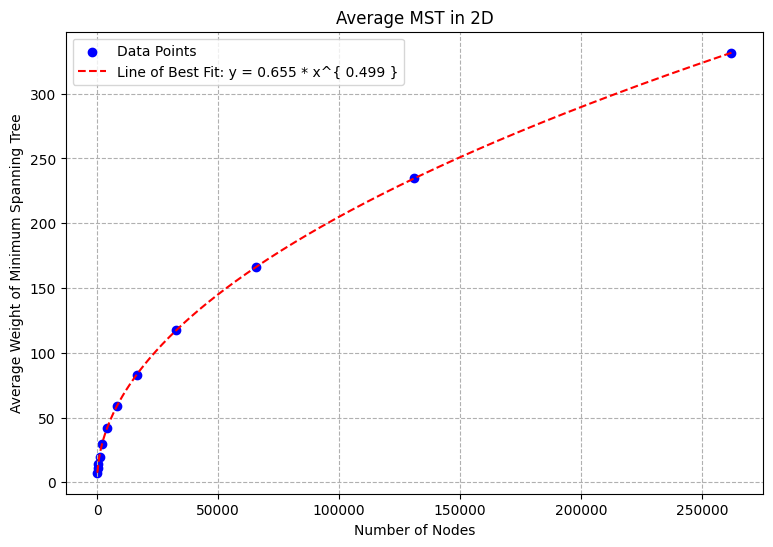

Fitted parameters: a = 0.6545934694753628, b = 0.4991530519576636


In [271]:
# 2D Average MST
n_values_2 = np.array([128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144])
average_tree_size_2 = np.array([7.52836, 10.6999, 14.439, 19.8415, 29.6441, 41.808, 58.9506, 83.1705, 117.578, 165.918, 234.572, 331.649])
title_2 = 'Average MST in 2D'

plot_and_fit_power_law(n_values_2, average_tree_size_2, title_2)

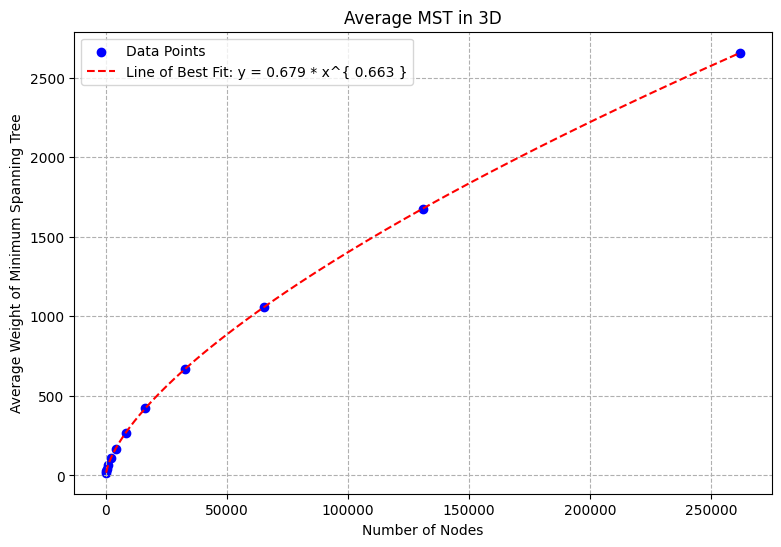

Fitted parameters: a = 0.6794043563192249, b = 0.6629175148180373


In [272]:
# 3D Average MST
n_values_3 = np.array([128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144])
average_tree_size_3 = np.array([16.7837, 27.6797, 42.8701, 67.9817, 106.574, 168.738, 267.244, 422.943, 668.998, 1059.06, 1676.71, 2656.08])
title_3 = 'Average MST in 3D'

plot_and_fit_power_law(n_values_3, average_tree_size_3, title_3)

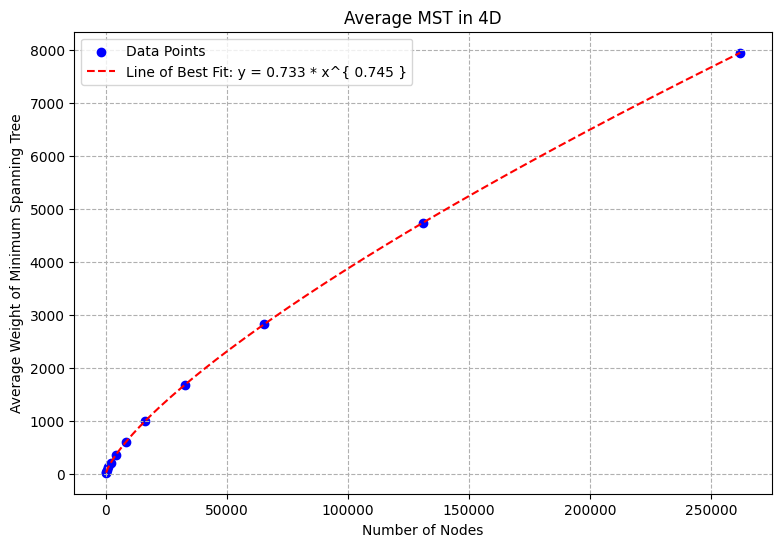

Fitted parameters: a = 0.7327733365735499, b = 0.7446998503928376


In [273]:
# 4D Average MST
n_values_3 = np.array([128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144])
average_tree_size_3 = np.array([28.2277, 47.1575, 78.3046, 130.192, 216.572, 360.875, 603.108, 1008.04, 1688.79, 2827.71, 4741.59, 7947.03])
title_3 = 'Average MST in 4D'

plot_and_fit_power_law(n_values_3, average_tree_size_3, title_3)